In [52]:
from utils.visual import *
import torch
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, MultipleLocator, FormatStrFormatter
import os

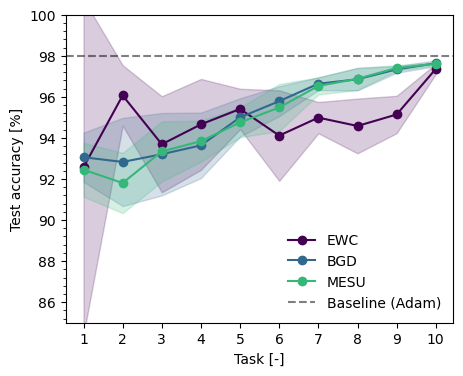

In [53]:
n_iterations = 10
paths = [
    "./paper-figures-djohan/saved-results/20240903-144331-Adam-DNN-BS64-512-PermutedMNIST-relu",
    "./paper-figures-djohan/saved-results/20240903-091749-BGD-BayesianNN-BS64-512-PermutedMNIST-relu",
    "./paper-figures-djohan/saved-results/20240903-092149-MESU-BayesianNN-BS64-512-PermutedMNIST-relu",
]

model_names = [
    "EWC",
    "BGD",
    "MESU", 
]

models = []
for path in paths:
    accuracies = []
    for it in range(n_iterations):
        accuracies.append(torch.stack(torch.load(os.path.join(path, f"params-network-{it}", "accuracy.pt"), map_location={'cuda:1': 'cuda:0'})))
    accuracies = torch.stack(accuracies)
    models.append(accuracies)
models = torch.stack(models)

fig, ax = plt.subplots(figsize=(5, 4))
palette = plt.get_cmap('viridis', len(models)+1)
for i, model in enumerate(models):
    mean, std = get_mean_std_accuracies(model, t_start=1, t_end=10)
    ax.plot(mean, color=palette(i), label=model_names[i], marker="o")
    ax.fill_between(np.arange(0, 10), mean-std, mean+std, color=palette(i), alpha=0.2)

# hline: fully connected
ax.axhline(y=98, color="black", linestyle='--', alpha=0.5, label="Baseline (Adam)")

ax.set_xticks(np.arange(0, 10, 1))
ax.set_xticklabels(np.arange(1, 11, 1))
ax.set_xlabel("Task [-]")
ax.set_ylabel("Test accuracy [%]")
ax.yaxis.set_minor_locator(AutoMinorLocator(5))
ax.legend(frameon=False, loc="lower right")
ax.set_ylim(85, 100)

title = versionning(folder="./paper/figures", title="permutedMNIST", format=".pdf")
plt.savefig(title, format="pdf", bbox_inches='tight')
plt.savefig(title.replace(".pdf", ".svg"), format="svg", bbox_inches='tight')
plt.show()